<a href="https://colab.research.google.com/github/SanskritiKushik5/NNDL/blob/main/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment 1: Implementation of CNN




###a) Image classification using CIFAR-10 Dataset.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

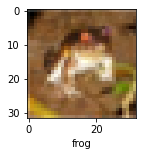

In [10]:
plot_sample(X_train, y_train, 0)

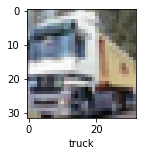

In [11]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.8135 - accuracy: 0.3555
Epoch 2/5
1563/1563 [==============================] - 108s 69ms/step - loss: 1.6246 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.5415 - accuracy: 0.4541
Epoch 4/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4816 - accuracy: 0.4756
Epoch 5/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4304 - accuracy: 0.4952


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.36      0.47      1000
           1       0.72      0.39      0.51      1000
           2       0.45      0.19      0.26      1000
           3       0.32      0.36      0.34      1000
           4       0.42      0.41      0.42      1000
           5       0.45      0.31      0.37      1000
           6       0.40      0.74      0.52      1000
           7       0.48      0.61      0.54      1000
           8       0.43      0.78      0.55      1000
           9       0.60      0.47      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4317 - accuracy: 0.4887
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0941 - accuracy: 0.6174
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9717 - accuracy: 0.6609
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8895 - accuracy: 0.6904
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8268 - accuracy: 0.7131
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7719 - accuracy: 0.7321
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7219 - accuracy: 0.7484
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6781 - accuracy: 0.7643
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6361 - accuracy: 0.7776
Epoch 10/10
1563/1563 [==============================] - 62s 40m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9464 - accuracy: 0.6979


[0.9464123249053955, 0.6978999972343445]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.64295692e-04, 6.98552394e-05, 3.50421621e-03, 8.04132462e-01,
        2.52890721e-04, 1.82604581e-01, 6.13258732e-03, 8.07371634e-06,
        2.76806229e-03, 3.62956052e-04],
       [5.50499745e-03, 8.15687049e-03, 6.55849653e-05, 5.56315172e-07,
        1.12554261e-07, 3.78322369e-08, 1.19204664e-07, 5.86760363e-11,
        9.86233830e-01, 3.78146906e-05],
       [1.10991776e-01, 2.05579046e-02, 1.09574629e-03, 7.76524073e-04,
        2.45451403e-04, 7.67455713e-05, 1.46182414e-04, 1.43872152e-04,
        8.42483461e-01, 2.34822426e-02],
       [6.32648051e-01, 1.26777275e-03, 6.02378976e-03, 9.58204255e-05,
        1.00928468e-04, 3.12200996e-06, 7.70256738e-05, 1.67090263e-07,
        3.59763324e-01, 2.00637460e-05],
       [1.11639756e-05, 1.87344249e-05, 6.42876774e-02, 4.08075824e-02,
        4.52739537e-01, 7.60130875e-04, 4.41357344e-01, 1.68574697e-05,
        8.81080780e-07, 1.05315429e-07]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

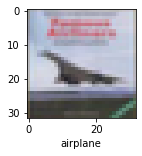

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
classes[y_classes[3]]

'airplane'